<a href="https://colab.research.google.com/github/Xeron66/Quantum-Computing-Notes/blob/main/Lec_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibmq-provider


# Importing Libraries

In [ ]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex


3 Types of Output -> Simulator

  1. Statevector
  2. Unitary
  3. Results after measurement


# Result After Measurement

# Build a Circuit


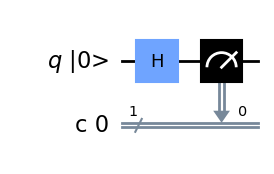

In [ ]:
## Create a circuit
circuit = QuantumCircuit(1,1)
#here we are taking 1 qbit measure and 1 cbit to store the result in

## Apply Gate
circuit.h(0)
# applying Hadamard gate gets the qbit into a superposition which can be used
# for fixed state

# apply measurement
circuit.measure(0, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)


# Select Simulator

In [ ]:
# Select a Simulator
simulator = Aer.get_backend('aer_simulator')

# assemble circuit
# by assembling we get a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# getting the histogram data
count = result.get_counts()



Job Status: job has successfully run


<ipython-input-4-f0ab87f5da7b>:9: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


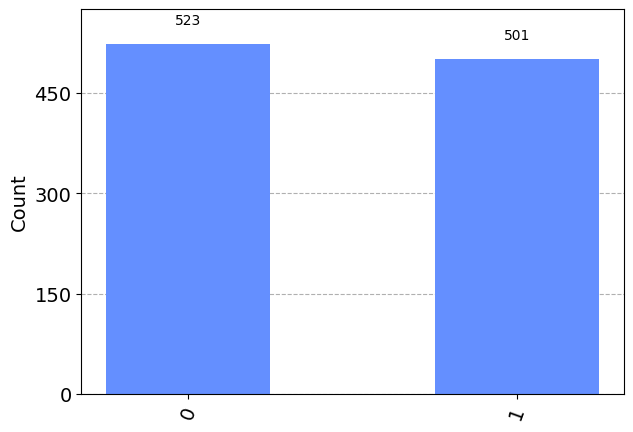

In [ ]:
plot_histogram(count)

In simulation wise, it shouldve given 50/50 result, in reality, the quantum computers are near perfection but not perfect. There are still errors and its being fixed and updated, the theory is also updated with time.

# Build A **Circuit**

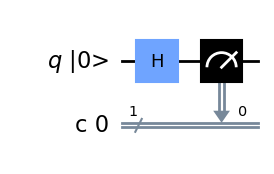

In [ ]:
## Creating the same circuit again (Not Necessary)
circuit = QuantumCircuit(1,1)
#here we are taking 1 qbit measure and 1 cbit to store the result in

## Apply Gate
circuit.h(0)
# applying Hadamard gate gets the qbit into a superposition which can be used
# for fixed state

# apply measurement
circuit.measure(0, 0)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)


# Run on Real Quantum Device


In [ ]:
## import library for QC (Quantum Computer)
from qiskit import IBMQ

## save API Token
IBMQ.save_account('1192be126933d579aedd7f316c9a298a4be662cf797f468631995e273bc5d39c9b7cfa3288700afdb3b74428cb88b96b77ea6c7ac21f606397212ea6b3fabb07')

## load account
IBMQ.load_account()

# select provider
provider = IBMQ.get_provider('ibm-q')

## select quantum device
# you can change the computer based on the names on IBM website
qcomp = provider.get_backend('simulator_stabilizer')

## run on real device
# to execute we call the execute F^n that has two arguments
# one is the circuit we want and the other is the platform we want to
# simulate on, in our case its a real device
# this will return a job
job = execute(circuit, backend = qcomp)

## monitor the job
job_monitor(job)

## get result
result = job.result()

## get histogram data
count = result.get_counts()

# Note: if it takes longer to execute the job, just change the
# machine, Tip => use the one with 5000 qubits!!

configrc.store_credentials:WARNING:2023-09-05 18:07:16,564: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-09-05 18:07:16,905: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


# Visualize the result after measurement

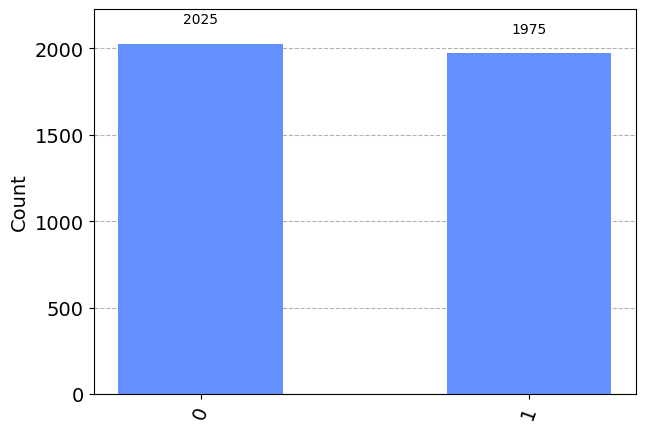

In [ ]:
plot_histogram(count)

# C NOT Gate
Trying to build a bit complex circuit...

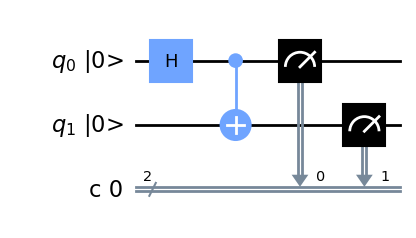

In [ ]:
## Create a circuit
circuit = QuantumCircuit(2, 2)
#here we are taking 2 qbit measure and 2 cbit to store the result

## Apply Gate
circuit.h(0)
# applying Hadamard gate gets the qbit into a superposition which can be used
# for fixed state

## Applying another gate here i.e., c not gate
# C not gate or cx gate is a multi qbit gate for that
# we need more than one qbit circuit
# its kinda like a not gate, the state of target qbit is
# changed to another state and stored into anothe qbit
circuit.cx(0, 1)
# here the argument of cx gate is, the first qbit is the control qbit
# and the second one is the target qbit
# in our case control qbit is 0 and target is 1

# apply measurement
# for more than one qbit we have to measure in the following way
circuit.measure(0, 0)
circuit.measure(1, 1)

# draw circuit
circuit.draw(output = 'mpl', initial_state=True)


# Simulating

In [ ]:
# Select a Simulator
simulator = Aer.get_backend('aer_simulator')

# assemble circuit
# by assembling we get a quantum object
qobj = assemble(circuit)

# run on simulator
job = simulator.run(qobj)

# monitor job
job_monitor(job)

# get result
result = job.result()

# getting the histogram data
count = result.get_counts()



<ipython-input-15-f0ab87f5da7b>:9: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


Job Status: job has successfully run


# Visualizing

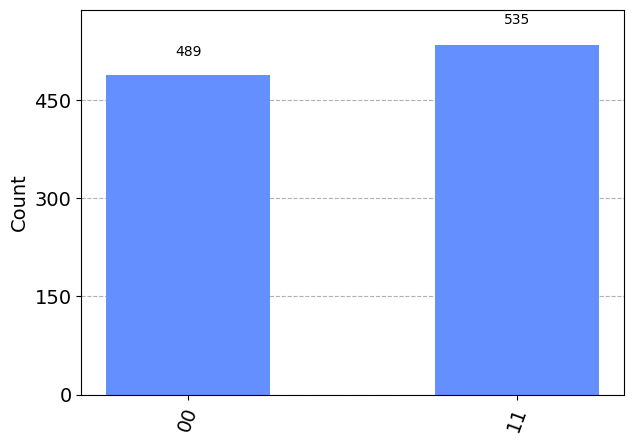

In [ ]:
plot_histogram(count)

# Now running this circuit in a real Quantum Computer

In [ ]:
## import library for QC (Quantum Computer)
from qiskit import IBMQ

## save API Token
IBMQ.save_account('1192be126933d579aedd7f316c9a298a4be662cf797f468631995e273bc5d39c9b7cfa3288700afdb3b74428cb88b96b77ea6c7ac21f606397212ea6b3fabb07')

## load account
IBMQ.load_account()

# select provider
provider = IBMQ.get_provider('ibm-q')

## select quantum device
# you can change the computer based on the names on IBM website
qcomp = provider.get_backend('simulator_stabilizer')

## run on real device
# to execute we call the execute F^n that has two arguments
# one is the circuit we want and the other is the platform we want to
# simulate on, in our case its a real device
# this will return a job
job = execute(circuit, backend = qcomp)

## monitor the job
job_monitor(job)

## get result
result = job.result()

## get histogram data
count = result.get_counts()

# Note: if it takes longer to execute the job, just change the
# machine, Tip => use the one with 5000 qubits!!

configrc.store_credentials:WARNING:2023-09-05 18:08:11,781: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-09-05 18:08:12,125: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


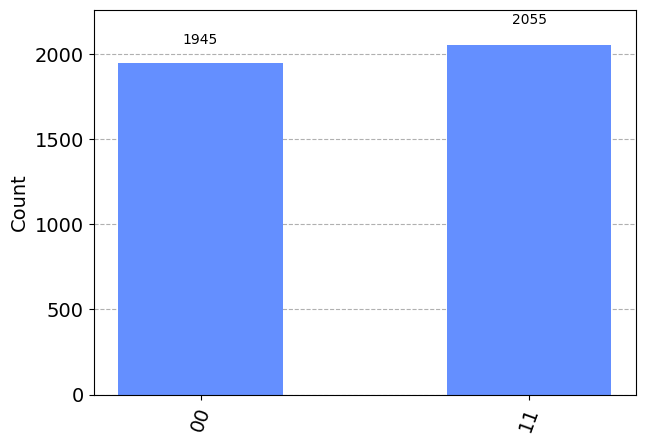

In [ ]:
plot_histogram(count)

# sometimes, all the states are shown i.e., 00 01 10 11 states
# this means that the super positions is broken
# and are into a bell state

In [ ]:
# select simulator
simulator = Aer.get_backend('aer_simulator')

# save statevector
circuit.save_statevector()

# assemble circuit
qobj = assemble(circuit)

# run simulator
job = simulator.run(qobj)

# get result
result = job.result()

# get final state
final_state = result.get_statevector()

<ipython-input-45-777c994b6fb1>:11: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(qobj)


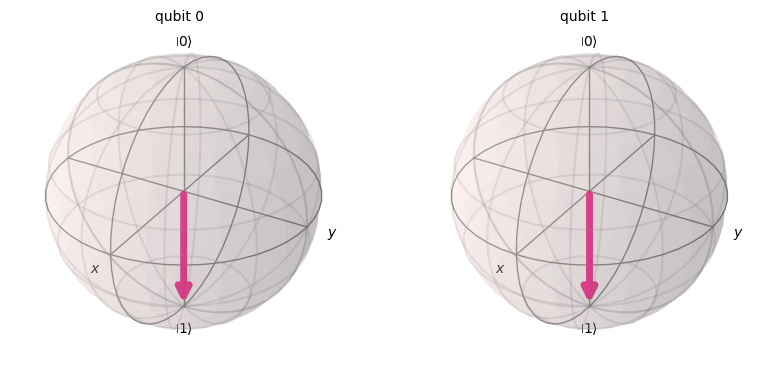

In [ ]:
plot_bloch_multivector(final_state)